In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse

In [2]:
tform = AffineTransform(scale=(1.3, 1.1), rotation=1, 
                        shear=0.7, translation=(210, 50))
image = warp(data.checkerboard(), 
             tform.inverse, 
             output_shape=(350, 350))
rr, cc = ellipse(310, 175, 10, 100)
image[rr, cc] = 1
image[180:230, 10:60] = 1
image[230:280, 60:110] = 1

In [3]:
coords = corner_peaks(corner_harris(image), min_distance=5)
print(coords)
coords_subpix = corner_subpix(image, coords, window_size=13)
print(coords_subpix)

[[ 26  21]
 [ 33  76]
 [ 40 130]
 [ 47 185]
 [ 49  11]
 [ 50 210]
 [ 51  35]
 [ 54  62]
 [ 60  93]
 [ 62 117]
 [ 65 144]
 [ 71 175]
 [ 74 202]
 [ 76 226]
 [ 78  52]
 [ 82  80]
 [ 88 111]
 [ 91 138]
 [ 92 161]
 [ 96 189]
 [102 220]
 [104  46]
 [108  74]
 [109  97]
 [113 125]
 [119 156]
 [122 183]
 [123 206]
 [127 234]
 [131 261]
 [135  91]
 [139 119]
 [140 142]
 [143 169]
 [150 201]
 [151 224]
 [154 251]
 [159  82]
 [160 105]
 [166 136]
 [170 164]
 [171 187]
 [174 214]
 [180  10]
 [180  59]
 [180 245]
 [182 269]
 [185 296]
 [188 123]
 [191 150]
 [197 181]
 [201 209]
 [202 232]
 [208 263]
 [211 290]
 [214 117]
 [217 144]
 [219 168]
 [225 199]
 [228 226]
 [229  10]
 [229  59]
 [229 249]
 [230 109]
 [233 277]
 [239 308]
 [240 331]
 [242 158]
 [250 213]
 [257 267]
 [264 322]
 [279  60]
 [279 109]
 [310  76]
 [310 274]]
[[ 24.87265141  19.5258441 ]
 [ 31.9501212   74.07540339]
 [ 39.03251253 128.60455845]
 [ 46.10663718 183.14817505]
 [ 48.63570705   9.84450384]
 [ 49.5284136  210.30130505]


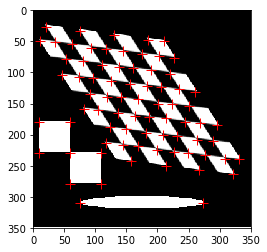

In [4]:
plt.imshow(image, interpolation='nearest', cmap='gray')
plt.plot(coords[:, 1], coords[:, 0], 'r+', markersize=10)
plt.axis([0, 350, 350, 0])
plt.show()